In [ ]:
# This is my Python project using some of the most popular libraries for Data Analysis.
# I used this Data: https://www.kaggle.com/datasets/ulrikthygepedersen/populations.
# From This Data I removed some of the Data as World Population, Europe Population, Asian Population and others.


In [ ]:
# This is summary of the Project

# 1. First of all, I imported all the libraries which I used in the project.
# 2. Creating a DataFrame.
# 3. Splitting the DataFrame from one column to four columns.
# 4. Setting the index for the column "Country Name."
# 5. Making a function which groups columns "year" and "value" into seven variables of each decade from 1960 to 2020.
# 6. Making a function which calculates the total sum of values of each decade from 1960 to 2020.
# 7. Making a dictionary of all decades from 1960 to 2020 where the year is the key and the value is the total population, and using seaborn to create a barplot.
# 8. Using the library Cufflinks to visualize an interactive graph.
# 9. Selecting the year 2021 and creating a variable.
# 10. Checking the types of columns and setting the "value" column to float.
# 11. Showing the 10 most populated countries in 2021 and using the library Plotly to visualize an interactive graph.
# 12. Showing the 10 least populated countries in 2021 and using the library Plotly to visualize an interactive graph.
# 13. Defining the data and layout for a choropleth map and visualizing it on the map of the world.
# 14. Selecting the data for the Czech Republic, creating a variable, and changing the type of the "value" column to float.
# 15. Creating an interactive bar chart using Plotly to visualize the population of the Czech Republic from 1960 to 2020.
# 16. Creating a line chart using Plotly Express to visualize the data for the Czech Republic from 1960 to 2020.
# 17. Making the same process for China to demonstrate how rapidly the population grew in comparison with the Czech Republic.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as pyo

In [33]:
pd.__version__

'2.0.0rc1'

In [34]:
# creating DataFrame 

df = pd.read_csv('population_all.csv')

In [35]:
df

,country_code;country_name;year;value
0,ABW;Aruba;1960;54608.0
1,ABW;Aruba;1961;55811.0
2,ABW;Aruba;1962;56682.0
3,ABW;Aruba;1963;57475.0
4,ABW;Aruba;1964;58178.0
...,...
13481,ZWE;Zimbabwe;2017;14751101.0
13482,ZWE;Zimbabwe;2018;15052184.0
13483,ZWE;Zimbabwe;2019;15354608.0
13484,ZWE;Zimbabwe;2020;15669666.0


In [36]:
# Split the "combined_data" column into four separate columns

df[['country_code', 'country_name', 'year', 'value']] = df['country_code;country_name;year;value'].str.split(';', expand=True)

# Drop the original "combined_data" column

df.drop(columns=['country_code;country_name;year;value'], inplace=True)


In [37]:
df

,country_code,country_name,year,value
0,ABW,Aruba,1960,54608.0
1,ABW,Aruba,1961,55811.0
2,ABW,Aruba,1962,56682.0
3,ABW,Aruba,1963,57475.0
4,ABW,Aruba,1964,58178.0
...,...,...,...,...
13481,ZWE,Zimbabwe,2017,14751101.0
13482,ZWE,Zimbabwe,2018,15052184.0
13483,ZWE,Zimbabwe,2019,15354608.0
13484,ZWE,Zimbabwe,2020,15669666.0


In [38]:
# Setting Index for column Country Name

df1 = df.set_index('country_name')

In [39]:
df1

,country_code,year,value
country_name,,,
Aruba,ABW,1960,54608.0
Aruba,ABW,1961,55811.0
Aruba,ABW,1962,56682.0
Aruba,ABW,1963,57475.0
Aruba,ABW,1964,58178.0
...,...,...,...
Zimbabwe,ZWE,2017,14751101.0
Zimbabwe,ZWE,2018,15052184.0
Zimbabwe,ZWE,2019,15354608.0


In [40]:
# This function takes a DataFrame with columns 'year' and 'value',
# Groups the data by decade based on the year column, and returns
# A dictionary where the keys are decade names (e.g. '1960s') and
# The values are the sum of 'value' for each decade.


decades = {}
for decade in range(1960, 2030, 10):
    decade_name = f"{decade}s"
    mask = (df1['year'].astype(int) % 10 == 0) & (df1['year'].astype(int) // 10 == decade // 10)
    decades[decade_name] = df1.loc[mask]


In [41]:
decades['1960s']['value'].astype(float).sum()

3035058520.0

In [42]:
# This function takes a dictionary where the keys are decade names 
# And the values are pandas DataFrames containing columns 'year' and 'value'.
# It loops through each decade, calculates the total sum of 'value' for that decade
# And prints it to the console in a formatted string.



for decade in decades:
    total = decades[decade]['value'].astype(float).sum()
    print(f"Total {decade}: {total}")

Total 1960s: 3035058520.0
Total 1970s: 3692837988.0
Total 1980s: 4445679724.0
Total 1990s: 5298879061.0
Total 2000s: 6152205959.0
Total 2010s: 6982365343.0
Total 2020s: 7839790478.0


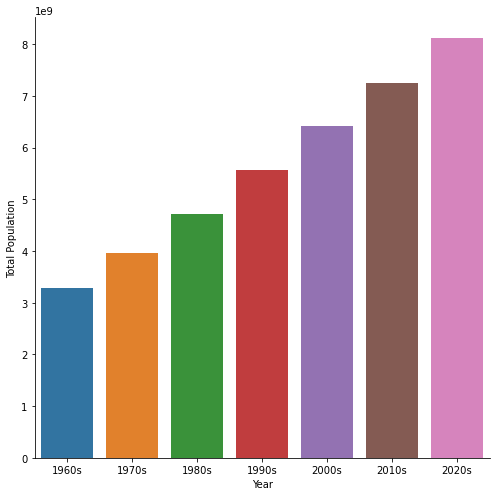

In [13]:
# Making a dictionary where The Key is a Year and the Value is Total Population

data = {'Year': ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'],
        'Total Population': [3282103338.0, 3955534735.0, 4715870106.0, 5565307499.0, 6420035992.0, 7258305815.0, 8113755709.0]}
df_temp = pd.DataFrame(data)

# Use seaborn to create a barplot of the data
sns.catplot(x='Year', y='Total Population', kind='bar', data=df_temp, height=7)





In [43]:
# Use cufflinks to create barplot of the data

df_temp.iplot(kind='bar', x='Year', y='Total Population', asFigure=True)

In [44]:
# Select only year 2021 from DataFrame

df2021s = df1.loc[df1['year'] == '2021']

In [45]:
df2021s
 

,country_code,year,value
country_name,,,
Aruba,ABW,2021,106537.0
Afghanistan,AFG,2021,40099462.0
Angola,AGO,2021,34503774.0
Albania,ALB,2021,2811666.0
Andorra,AND,2021,79034.0
...,...,...,...
Kosovo,XKX,2021,1786038.0
Yemen Rep.,YEM,2021,32981641.0
South Africa,ZAF,2021,59392255.0


In [46]:
# Checkig the types of columns

df1.dtypes

country_code    object
year            object
value           object
dtype: object

In [47]:
# Changing object of value column to float column

df2021s['value'] = pd.to_numeric(df2021s['value'])

In [19]:
df2021s.dtypes

country_code     object
year             object
value           float64
dtype: object

In [48]:
top_10 = df2021s.sort_values('value', ascending=False).head(10)

In [49]:
top_10

,country_code,year,value
country_name,,,
China,CHN,2021,1.412360e+09
India,IND,2021,1.407564e+09
United States,USA,2021,3.318937e+08
Indonesia,IDN,2021,2.737532e+08
Pakistan,PAK,2021,2.314021e+08
Brazil,BRA,2021,2.143262e+08
Nigeria,NGA,2021,2.134013e+08
Bangladesh,BGD,2021,1.693563e+08
Russian Federation,RUS,2021,1.434493e+08


In [50]:
# Creating a bar chart using Plotly and customizing the layout

top_10_graph = go.Figure(go.Bar(x=top_10['country_code'], y=top_10['value'], marker={'color': 'red'}))
top_10_graph.update_layout(title='Top 10 Biggest Countries in 2021', xaxis_title='Country', yaxis_title='Population')
top_10_graph

In [51]:
bottom_10 = df2021s.sort_values('value', ascending=False).tail(10)

In [52]:
bottom_10

,country_code,year,value
country_name,,,
Marshall Islands,MHL,2021,42050.0
Liechtenstein,LIE,2021,39039.0
Monaco,MCO,2021,36686.0
San Marino,SMR,2021,33745.0
Gibraltar,GIB,2021,32669.0
St. Martin (French part),MAF,2021,31948.0
British Virgin Islands,VGB,2021,31122.0
Palau,PLW,2021,18024.0
Nauru,NRU,2021,12511.0


In [25]:
# Creating a bar chart using Plotly and customizing the layout

bottom_10_graph = go.Figure(go.Bar(x=bottom_10['country_code'], y=bottom_10['value'],marker={'color': 'blue'}))
bottom_10_graph.update_layout(title='10 Smallest Countries by Population in 2021', xaxis_title='Country', yaxis_title='Population')
bottom_10_graph

In [53]:
# Define the data for the choropleth map
data = go.Choropleth(
    locations=df2021s.index,
    z=df2021s['value'],
    text=df2021s.index,
    colorscale='Viridis',
    reversescale = True,
    locationmode = 'country names',
    colorbar_title='Value'
)

# Define the layout for the choropleth map
layout = go.Layout(
    title='Choropleth Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Combine the data and layout and plot the choropleth map
fig = go.Figure(data=[data], layout=layout)
pyo.iplot(fig)


In [54]:
Czech = df[df["country_name"] == "Czechia"]

In [55]:
Czech['value'] = pd.to_numeric(Czech['value'])

In [56]:
Czech


,country_code,country_name,year,value
3038,CZE,Czechia,1960,9602006.0
3039,CZE,Czechia,1961,9586651.0
3040,CZE,Czechia,1962,9624660.0
3041,CZE,Czechia,1963,9670685.0
3042,CZE,Czechia,1964,9727804.0
...,...,...,...,...
3095,CZE,Czechia,2017,10594438.0
3096,CZE,Czechia,2018,10629928.0
3097,CZE,Czechia,2019,10671870.0
3098,CZE,Czechia,2020,10697858.0


In [57]:
# Creating an interactive bar chart using Plotly

Czech.iplot(kind='bar', x='year', y='value', asFigure=True, colors = 'navy')


In [58]:
# Creating a line chart using Plotly Express

CzechOverTime = px.line(Czech, x="year", y="value", title="Population of Czech Over Time")
CzechOverTime

In [ ]:
# There is also China Population during 60 years in comparison with Czech republic

In [60]:
China = df[df["country_name"] == "China"]

In [61]:
China['value'] = pd.to_numeric(China['value'])

In [62]:
China

,country_code,country_name,year,value
2232,CHN,China,1960,6.670700e+08
2233,CHN,China,1961,6.603300e+08
2234,CHN,China,1962,6.657700e+08
2235,CHN,China,1963,6.823350e+08
2236,CHN,China,1964,6.983550e+08
...,...,...,...,...
2289,CHN,China,2017,1.396215e+09
2290,CHN,China,2018,1.402760e+09
2291,CHN,China,2019,1.407745e+09
2292,CHN,China,2020,1.411100e+09


In [63]:
# Creating an interactive bar chart using Plotly

China.iplot(kind='bar', x='year', y='value', asFigure=True, colors = 'red')

In [64]:
# Creating a line chart using Plotly Express

ChinaOverTime = px.line(China, x="year", y="value", title="Population of China Over Time")
ChinaOverTime